In [2]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

In [3]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

c:\Users\15199\miniconda3\envs\dsi_participant\lib\site-packages\dask\dataframe\_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [4]:
ft_dir = os.getenv("FEATURES_DATA")
os.path.join(ft_dir, '*.parquet')

'../../05_src/data/features/stock_features.parquet\\*.parquet'

In [5]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

In [6]:
df['Ticker'].unique()

array(['DOV', 'CBRE', 'FANG', 'DTE', 'AOS', 'BDX', 'BA', 'KEY', 'BXP',
       'INCY', 'ORLY', 'BRO', 'CTVA', 'MCO', 'REG', 'FITB', 'RTX', 'FSLR',
       'HAS', 'ZBH', 'HWM', 'RL', 'APA', 'HSY', 'LDOS', 'MRNA', 'ECL',
       'BF.B', 'FLT', 'PFE', 'BIIB', 'FOXA', 'PNW', 'STZ', 'INTU', 'AEE',
       'SNPS', 'GWW', 'LH', 'IBM', 'TFX', 'CCL', 'WM', 'VZ', 'DFS', 'FDX',
       'VRSK', 'UHS', 'PARA', 'XEL', 'FOX', 'ZTS', 'CTSH', 'AAL', 'AIG',
       'BR', 'EL', 'JNJ', 'LIN', 'EQR', 'MTCH', 'EOG', 'CCI', 'WST',
       'HAL', 'MOH', 'NKE', 'KMB', 'TDY', 'TMUS', 'KLAC', 'MSCI', 'TAP',
       'GPN', 'MCK', 'AES', 'JCI', 'TDG', 'VLO', 'CAH', 'GM', 'ED', 'SNA',
       'DOW', 'CMA', 'TRMB', 'DE', 'GE', 'LHX', 'META', 'CEG', 'AMP',
       'MCHP', 'AEP', 'KMI', 'TSN', 'PEAK', 'UNH', 'TRGP', 'IDXX', 'PFG',
       'GRMN', 'MOS', 'IFF', 'MO', 'ETSY', 'HSIC', 'AME', 'IQV', 'INVH',
       'MRK', 'EW', 'PM', 'ANSS', 'TROW', 'ABBV', 'EXPD', 'MAA', 'D',
       'PSA', 'CRM', 'EG', 'XRAY', 'WFC', 'MHK', 'KEYS', 

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [7]:
df.sample(n = 5, random_state=42)

Price,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Year,Close_lag_1
2772847,WAB,2007-03-13 00:00:00+00:00,14.814154,15.860000,16.285000,15.690000,16.215000,756600.0,2007,16.315001
2653309,HPE,2009-04-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2009,NaN
2812898,CMS,2021-11-29 00:00:00+00:00,55.614101,61.130001,61.250000,59.900002,60.330002,1160000.0,2021,60.130001
2938014,CDNS,2005-10-28 00:00:00+00:00,16.000000,16.000000,16.110001,15.820000,16.100000,2504300.0,2005,16.150000
654040,IFF,2009-07-29 00:00:00+00:00,24.006842,34.049999,34.430000,33.950001,34.299999,729400.0,2009,34.500000


In [8]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [9]:
idx = df['Ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5676, 10), (56763, 10))

Look at the distribution of tickers.

<Axes: xlabel='Ticker'>

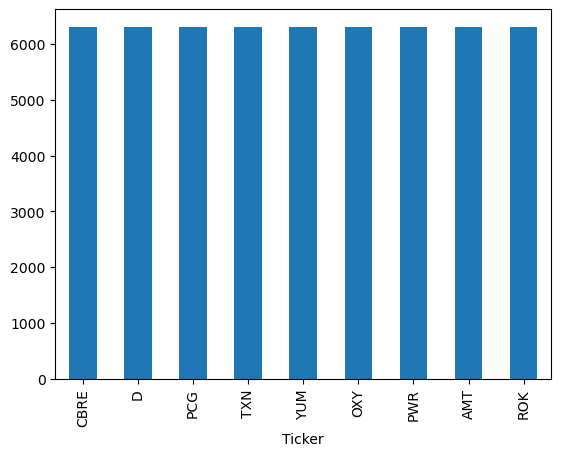

In [10]:
small_df['Ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='Ticker'>

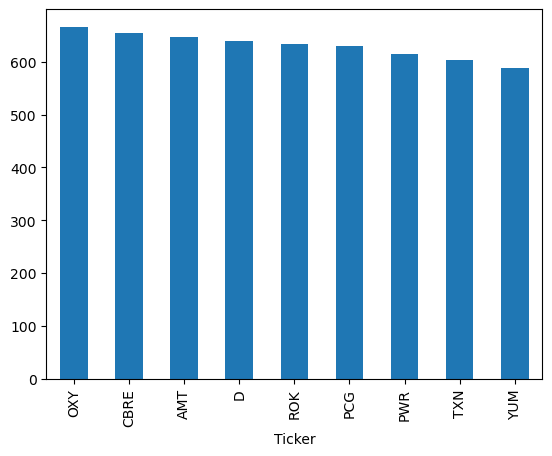

In [11]:
simple_sample_dt['Ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='Ticker'>

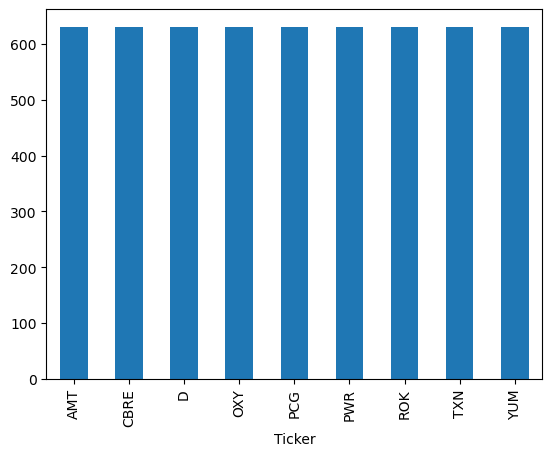

In [12]:
strat_sample_dt = small_df.groupby(['Ticker']).sample(frac = 0.1)
strat_sample_dt['Ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\15199\AppData\Local\Temp\ipykernel_23424\2388710987.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='Ticker'>

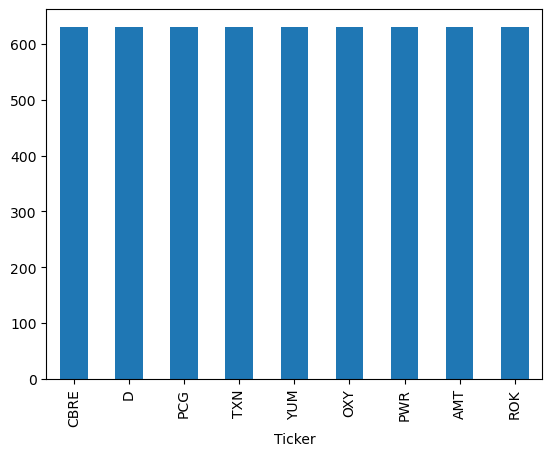

In [13]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('Ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['Ticker'].isin(select_tickers)]['Ticker'].value_counts().plot(kind='bar')